In [1]:
# /Users/snehabhatt/Documents/DataScience/GlassDoorReviews
## for honeywelll

import os as os
os.chdir("/Users/snehabhatt/Documents")
os.listdir()
import pandas as pd
import matplotlib.pyplot as plot

GlassdoorReviewDs=pd.read_csv('glassdoortest1.csv',encoding="ISO-8859-1")

In [2]:
GlassdoorReviewDs.head()

,Unnamed: 0,date,title,pros,cons
0,1,13-Apr-18,Good Company to Work For,"Great Pay, Flexible Hours, Unlimited Vacation.","Health Care, 401K, nothing else really"
1,2,16-Apr-18,First Impressions,Great staff and very helpful. Fair compensatio...,As a relatively new employee I have not experi...
2,3,12-Apr-18,Sr. Engineering Technologist,"Great benefits, working condition and people!",Must make a 30 mile commute.
3,4,11-Apr-18,Environmental Specialist,Very supportive environment for learning new t...,Corporate is slow in taking decisions
4,5,12-Apr-18,Sales,"Work Life Balance, Slightly above average pay,...","High health care cost, high employee cost of c..."


In [3]:
GlassdoorReviewDs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
Unnamed: 0    2000 non-null int64
date          2000 non-null object
title         1995 non-null object
pros          2000 non-null object
cons          2000 non-null object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [4]:
GlassdoorReviewDs['date']=pd.to_datetime(GlassdoorReviewDs['date'])
# pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

In [5]:
GlassdoorReviewDs=GlassdoorReviewDs.iloc[:,1:]

In [6]:
GlassdoorReviewDs.head()

,date,title,pros,cons
0,2018-04-13,Good Company to Work For,"Great Pay, Flexible Hours, Unlimited Vacation.","Health Care, 401K, nothing else really"
1,2018-04-16,First Impressions,Great staff and very helpful. Fair compensatio...,As a relatively new employee I have not experi...
2,2018-04-12,Sr. Engineering Technologist,"Great benefits, working condition and people!",Must make a 30 mile commute.
3,2018-04-11,Environmental Specialist,Very supportive environment for learning new t...,Corporate is slow in taking decisions
4,2018-04-12,Sales,"Work Life Balance, Slightly above average pay,...","High health care cost, high employee cost of c..."


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(GlassdoorReviewDs['title'].values.astype('U'))

In [8]:
doc_term_matrix

<2000x607 sparse matrix of type '<class 'numpy.int64'>'
	with 4610 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [10]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

value
mediocrity
specialist
reorganization
exempt
versatile
support
unfair
inconsistent
bosses


In [11]:
first_topic = LDA.components_[0]

In [12]:
top_topic_words = first_topic.argsort()[-10:]

In [13]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

lead
engineers
environment
high
human
tech
sales
job
specialist
employees


In [14]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['lead', 'engineers', 'environment', 'high', 'human', 'tech', 'sales', 'job', 'specialist', 'employees']


Top 10 words for topic #1:
['business', 'technician', 'terrible', 'worst', 'production', 'ii', 'working', 'marketing', 'sr', 'honeywell']


Top 10 words for topic #2:
['systems', 'mechanical', 'manufacturing', 'program', 'review', 'senior', 'project', 'engineering', 'manager', 'engineer']


Top 10 words for topic #3:
['overall', 'used', 'don', 'director', 'experience', 'great', 'analyst', 'good', 'work', 'place']


Top 10 words for topic #4:
['new', 'poor', 'people', 'benefits', 'management', 'aerospace', 'work', 'great', 'good', 'company']




In [15]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(2000, 5)

In [16]:
GlassdoorReviewDs['topics'] = topic_values.argmax(axis=1)

In [17]:
GlassdoorReviewDs.head()

,date,title,pros,cons,topics
0,2018-04-13,Good Company to Work For,"Great Pay, Flexible Hours, Unlimited Vacation.","Health Care, 401K, nothing else really",4
1,2018-04-16,First Impressions,Great staff and very helpful. Fair compensatio...,As a relatively new employee I have not experi...,3
2,2018-04-12,Sr. Engineering Technologist,"Great benefits, working condition and people!",Must make a 30 mile commute.,1
3,2018-04-11,Environmental Specialist,Very supportive environment for learning new t...,Corporate is slow in taking decisions,0
4,2018-04-12,Sales,"Work Life Balance, Slightly above average pay,...","High health care cost, high employee cost of c...",0


In [19]:
!pip install WordCloud

    100% |████████████████████████████████| 163kB 1.4MB/s ta 0:00:01


!pip3 install umap
import UMAP from umap


#X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(GlassdoorReviewDs['topics'])

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

In [20]:
!pip install wordcloud
from wordcloud import WordCloud

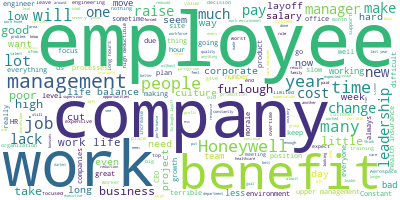

In [22]:
# Join the different processed titles together.
long_string = ','.join(list(GlassdoorReviewDs['cons'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

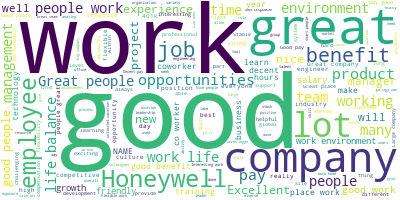

In [23]:
# Join the different processed titles together.
long_string = ','.join(list(GlassdoorReviewDs['pros'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()